<a href="https://colab.research.google.com/github/chizhang9135/CMU_FALL24_SEM_TEAM/blob/master/Presentation_of_Project_Sprint_1_Agile_Sprint_Process_%26_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Need to rerun
!pip install scanpy
!pip install cellxgene_census
!pip install --user scikit-misc
!pip install python-igraph
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.5 MB/s eta 0:00:00


In [ ]:
 # Need to rerun
# Import Function
import urllib
import cellxgene_census
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from scipy.stats import ttest_ind
import re
import os
import glob

In [ ]:
# Need to rerun
# Clear all .h5ad files in the current working directory before each run
for file_path in glob.glob("*.h5ad"):
    os.remove(file_path)
print("All .h5ad files removed.")

# List of IDs to be downloaded
dataset_ids = [
    "9813a1d4-d107-459e-9b2e-7687be935f69",
    "2f05ab20-a092-4bab-9276-3e0eb24e3fee",
    "72955cdb-bd92-4135-aa52-21f33f9640db",
    "f3ee7613-b27f-4deb-a5aa-1d4f9a2db963",
    "1c739a3e-c3f5-49d5-98e0-73975e751201",
    "65badd7a-9262-4fd1-9ce2-eb5dc0ca8039"
    # Add more IDs as needed
]

# Placeholder for storing loaded AnnData objects
ann_data_list = []

# Loop over IDs to download and load the datasets
for idx, dataset_id in enumerate(dataset_ids):
    file_name = f"data_{idx}.h5ad"
    print(f"Downloading dataset with ID: {dataset_id}")

    try:
        cellxgene_census.download_source_h5ad(dataset_id, to_path=file_name)
        adata = sc.read_h5ad(file_name)
        ann_data_list.append(adata)
        print(f"Successfully downloaded and loaded dataset with ID: {dataset_id}")
    except KeyError:
        print(f"Failed to download dataset with ID: {dataset_id} - Unknown dataset_id")
    except Exception as e:
        print(f"An error occurred while downloading dataset with ID: {dataset_id} - {e}")

# Combine all datasets into one AnnData object if there is any data to combine
if ann_data_list:
    adata = ann_data_list[0].concatenate(
        *ann_data_list[1:], join='outer', batch_key='batch_id'
    )
    print("Successfully combined all datasets into a single AnnData object.")
else:
    print("No datasets were successfully loaded for combination.")


All .h5ad files removed.


Downloading: 100%|██████████| 229M/229M [00:15<00:00, 15.9MB/s]


Successfully downloaded and loaded dataset with ID: 9813a1d4-d107-459e-9b2e-7687be935f69


Downloading: 100%|██████████| 601M/601M [00:40<00:00, 15.6MB/s]


Successfully downloaded and loaded dataset with ID: 2f05ab20-a092-4bab-9276-3e0eb24e3fee
Failed to download dataset with ID: 72955cdb-bd92-4135-aa52-21f33f9640db - Unknown dataset_id
Failed to download dataset with ID: f3ee7613-b27f-4deb-a5aa-1d4f9a2db963 - Unknown dataset_id


Downloading: 100%|██████████| 1.79G/1.79G [01:56<00:00, 16.6MB/s]


Successfully downloaded and loaded dataset with ID: 1c739a3e-c3f5-49d5-98e0-73975e751201


Downloading: 100%|██████████| 6.67G/6.67G [07:20<00:00, 16.2MB/s]


Successfully downloaded and loaded dataset with ID: 65badd7a-9262-4fd1-9ce2-eb5dc0ca8039


<ipython-input-3-fccea9da860f>:38: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = ann_data_list[0].concatenate(


Successfully combined all datasets into a single AnnData object.


In [ ]:
print(adata)

for idx, adata in enumerate(ann_data_list):
    print(f"Dataset {idx + 1}: {dataset_ids[idx]}")
    print("Unique columns in .obs:")
    print(adata.obs.columns.tolist())
    print("Unique columns in .var:")
    print(adata.var.columns.tolist())
    print("-" * 50)

View of AnnData object with n_obs × n_vars = 1134290 × 11
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'Sample', 'author_age', 'Brain.region', 'Prep', 'Cause_of_death_comorbidities', 'nNuclei', 'Biogroup', 'author_disease', 'Batch', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.3', 'integrated_snn_res.10', 'integrated_snn_res.20', 'integrated_snn_res.50', 'integra

In [ ]:
# Need to rerun
gens_dir = {'SLC26A3': 'ENSG00000091138',
            'RASGEF1B': 'ENSG00000138670',
            'RP11-701H24.9': 'ENSG00000214265',
            'LINGO1': 'ENSG00000169783',
            'PDE4DIP': 'ENSG00000178104',
            'AC159540.1': 'ENSG00000230606',
            'RP11-289H16.1': 'ENSG00000224363',
            'RP11-219A15.1': 'ENSG00000266302',
            'LINC01609': 'ENSG00000253103',
            'PHYHIP': 'ENSG00000168490',
            'RP11-745L13.2': 'ENSG00000251555'
            }
gens_name = list(gens_dir.keys())
gens_id = list(gens_dir.values())

In [ ]:
# Need to rerun
adata  = adata[:,adata.var.index.isin(gens_id)]

In [ ]:
# helper function
def extract_age(stage):
    match = re.search(r'\d+', stage)
    return int(match.group()) if match else None

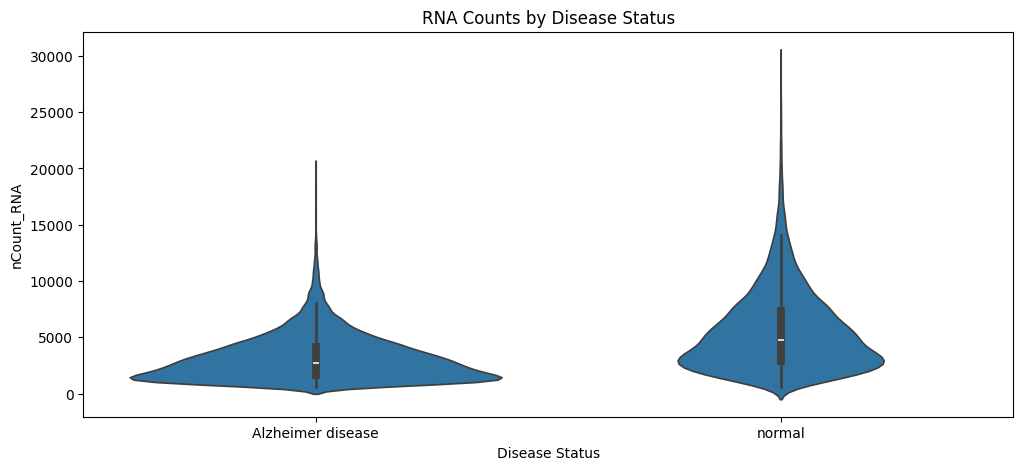

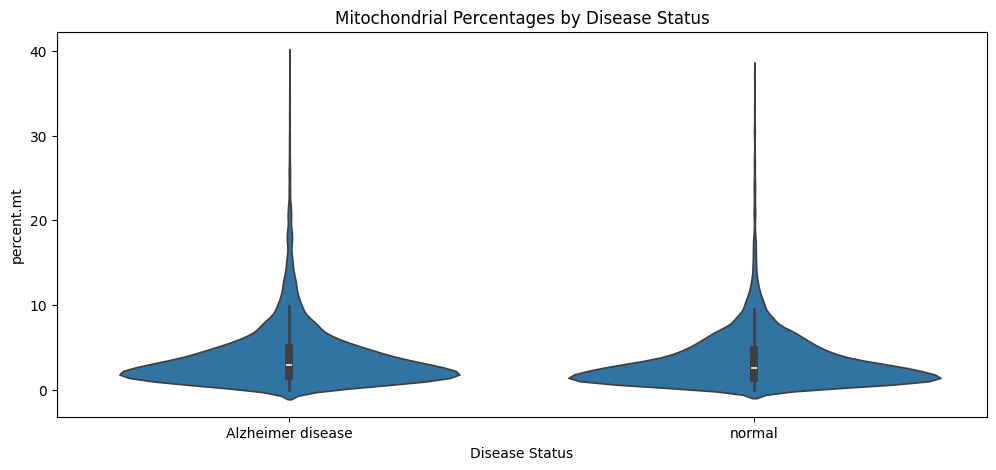

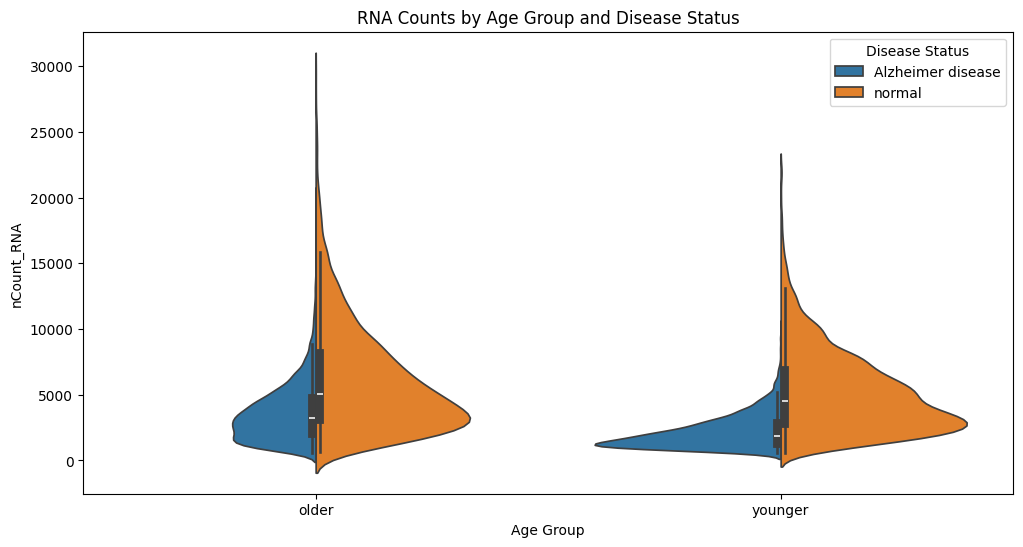

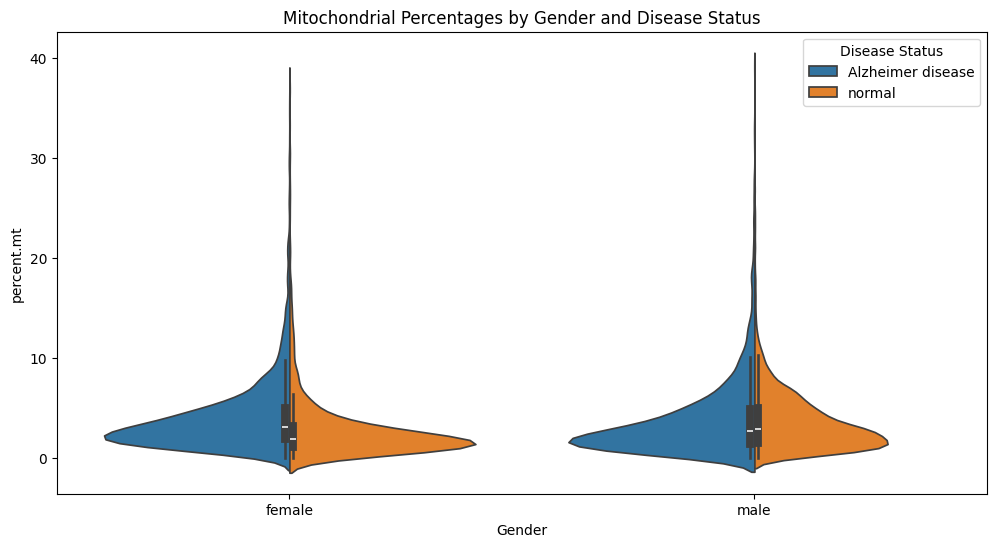

In [ ]:
adata.obs['age'] = adata.obs['development_stage'].apply(extract_age).astype(float)
adata_filtered = adata[(adata.obs['age'] >= 57) & (adata.obs['age'] <= 89)].copy()

adata_filtered = adata_filtered[adata_filtered.obs['disease'].isin(['Alzheimer disease', 'normal'])].copy()
adata_filtered.obs['disease_status'] = adata_filtered.obs['disease']


plt.figure(figsize=(12, 5))
sns.violinplot(x='disease_status', y='nCount_RNA', data=adata_filtered.obs)
plt.title("RNA Counts by Disease Status")
plt.xlabel("Disease Status")
plt.ylabel("nCount_RNA")
plt.show()


plt.figure(figsize=(12, 5))
sns.violinplot(x='disease_status', y='percent.mt', data=adata_filtered.obs)
plt.title("Mitochondrial Percentages by Disease Status")
plt.xlabel("Disease Status")
plt.ylabel("percent.mt")
plt.show()


adata_filtered.obs['age_group'] = adata_filtered.obs['age'].apply(lambda x: 'younger' if x <= 70 else 'older')
adata_filtered.obs['gender'] = adata_filtered.obs['sex']


plt.figure(figsize=(12, 6))
sns.violinplot(x='age_group', y='nCount_RNA', hue='disease_status', data=adata_filtered.obs, split=True)
plt.title("RNA Counts by Age Group and Disease Status")
plt.xlabel("Age Group")
plt.ylabel("nCount_RNA")
plt.legend(title="Disease Status")
plt.show()

# Violin plot to analyze mitochondrial percentages by gender and disease status
plt.figure(figsize=(12, 6))
sns.violinplot(x='gender', y='percent.mt', hue='disease_status', data=adata_filtered.obs, split=True)
plt.title("Mitochondrial Percentages by Gender and Disease Status")
plt.xlabel("Gender")
plt.ylabel("percent.mt")
plt.legend(title="Disease Status")
plt.show()

The three UMAP (Uniform Manifold Approximation and Projection) plots presented illustrate the distribution and clustering of data points across three different dimensions—disease status, age group, and gender. The first plot (labeled “UMAP by Disease”) shows the distribution of individuals categorized as having Alzheimer’s disease (blue) or being normal (orange). There is a relatively high level of overlap between the two clusters, indicating that while there may be differences between the Alzheimer’s and normal groups, these differences are not entirely discrete. However, some regions of stronger clustering can be seen for either group, which might suggest the existence of some underlying patterns separating disease from normal status in the dataset.

The second plot (labeled “UMAP by Age Group”) separates data points into older (blue) and younger (orange) individuals. Similar to the disease plot, there is a significant overlap in the clusters, but there are also discernible groupings within each age cohort. The distribution suggests that age may play a role in the features being measured, with specific areas in the space being more densely populated by older or younger individuals. This could hint at age-dependent variations or characteristics within the data, although the degree of separation suggests a more complex relationship.

The third plot (labeled “UMAP by Gender”) categorizes individuals into female (blue) and male (orange). Here, the overlap is significant, and no distinct separation is immediately evident based on gender alone. This indicates that gender may not have a strong influence on the primary dimensions captured by this UMAP representation. The dense overlapping of male and female clusters suggests that any gender-based distinctions are relatively subtle and may require more specific analysis or alternative dimensions to identify clear patterns. Overall, while each demographic factor (disease status, age, gender) has some effect on the data distribution, none provide a strong, standalone separation, highlighting the complexity and multifactorial nature of the data.

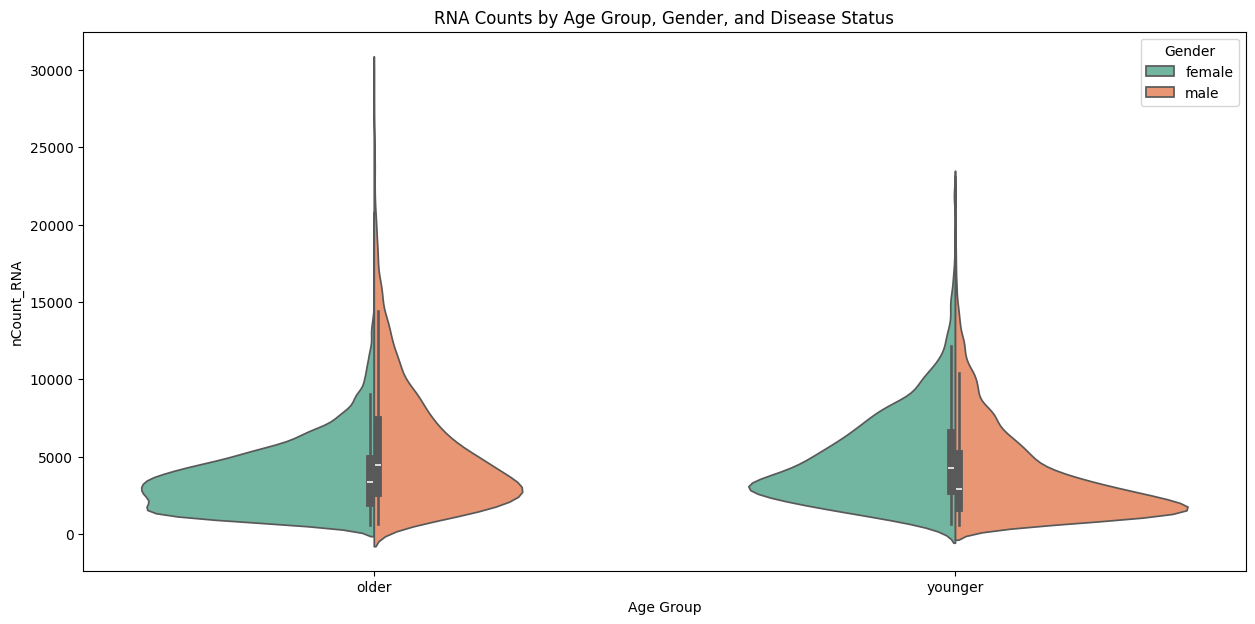

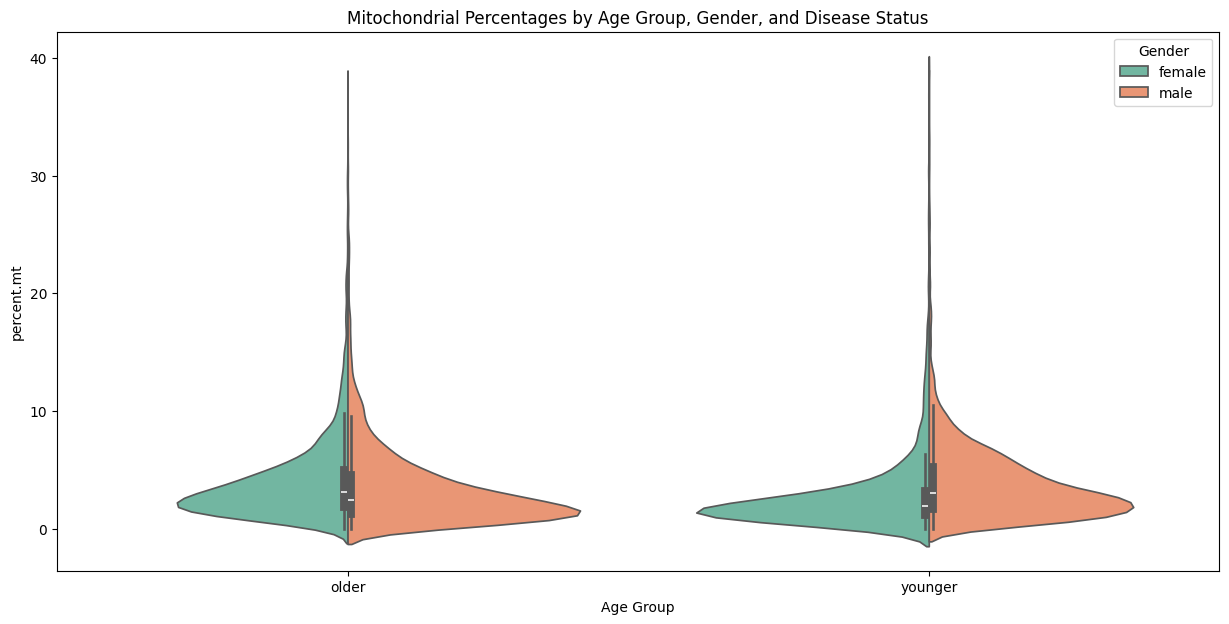

In [ ]:
adata_filtered = adata[(adata.obs['age'] >= 57) & (adata.obs['age'] <= 89)].copy()
adata_filtered.obs['disease_status'] = adata_filtered.obs['disease']
adata_filtered.obs['age_group'] = adata_filtered.obs['age'].apply(lambda x: 'younger' if x <= 70 else 'older')
adata_filtered.obs['gender'] = adata_filtered.obs['sex']

plt.figure(figsize=(15, 7))
sns.violinplot(x='age_group', y='nCount_RNA', hue='gender', data=adata_filtered.obs, split=True, palette='Set2')
plt.title("RNA Counts by Age Group, Gender, and Disease Status")
plt.xlabel("Age Group")
plt.ylabel("nCount_RNA")
plt.legend(title="Gender")
plt.show()

plt.figure(figsize=(15, 7))
sns.violinplot(x='age_group', y='percent.mt', hue='gender', data=adata_filtered.obs, split=True, palette='Set2')
plt.title("Mitochondrial Percentages by Age Group, Gender, and Disease Status")
plt.xlabel("Age Group")
plt.ylabel("percent.mt")
plt.legend(title="Gender")
plt.show()

The provided violin plots illustrate RNA counts and mitochondrial percentages segmented by age group, gender, and disease status.

1.	RNA Counts by Age Group, Gender, and Disease Status:
The first plot shows the distribution of RNA counts across two age groups, “older” and “younger,” and stratified by gender (female and male). There appears to be a higher concentration of RNA counts around the median for both genders across the age groups, with a relatively broad distribution. Notably, male and female individuals display a somewhat comparable distribution across both age categories, though some slight differences in density peaks can be observed. Both age groups show long tails in the distribution, suggesting the presence of individuals with exceptionally high RNA counts. This indicates variability within RNA counts, but the overlap suggests that gender might not lead to a distinct separation within age groups.

2.	Mitochondrial Percentages by Age Group, Gender, and Disease Status:
The second plot focuses on the distribution of mitochondrial percentages across age groups and genders. Similar to the RNA counts, the distribution shows considerable overlap between male and female groups, with the median values being relatively close. There is a noticeable variability in mitochondrial percentages, especially with a long tail extending to higher values. This may indicate potential outliers or subpopulations with elevated mitochondrial percentages within each age group. The older and younger groups do not show a pronounced separation based solely on gender, which suggests that mitochondrial percentages may not differ significantly between genders within these age brackets.

Overall, both plots indicate that while age and gender may have some influence on RNA counts and mitochondrial percentages, there is considerable overlap, suggesting that other factors or combinations of features may drive greater differences in the data. Further stratification by disease status and deeper exploration of the underlying biological variability would likely provide more insight into these distributions.

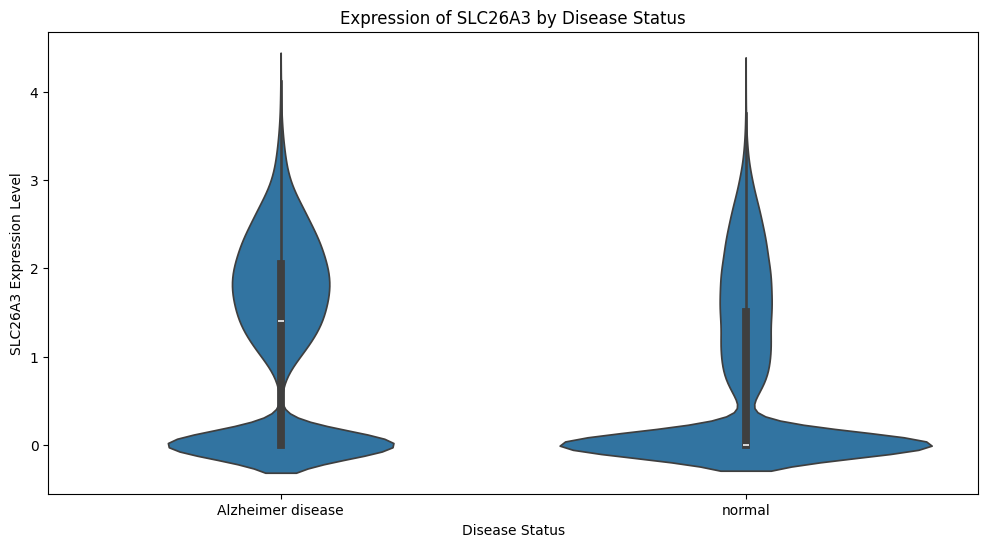

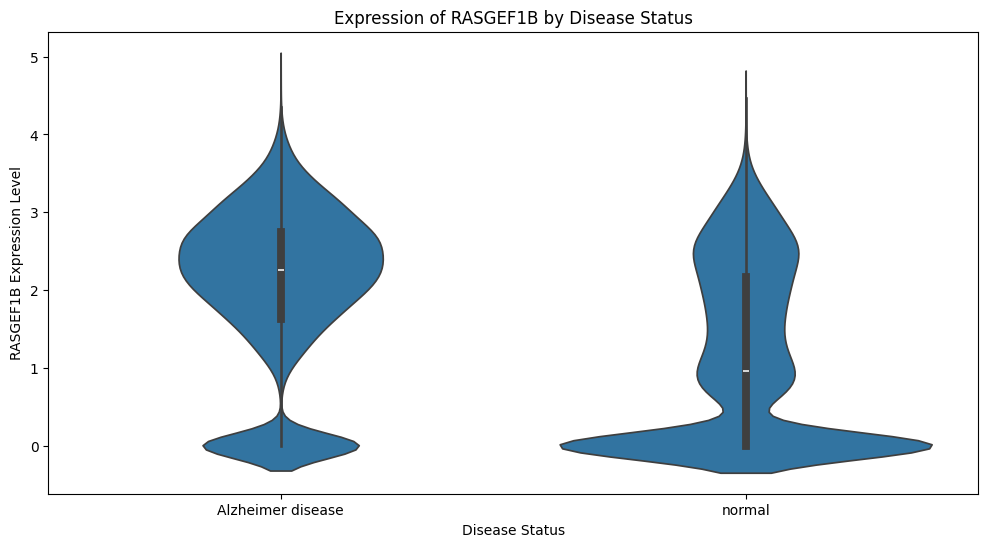

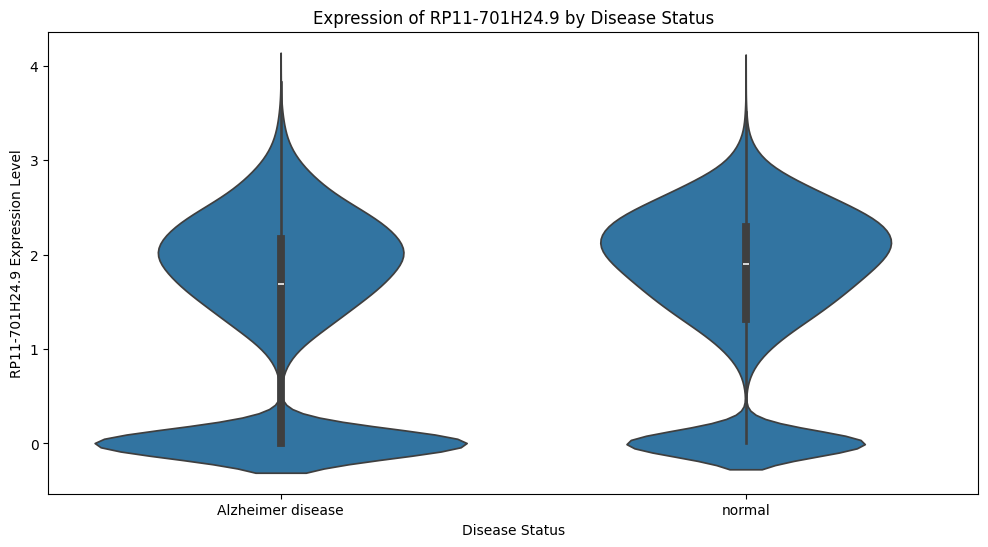

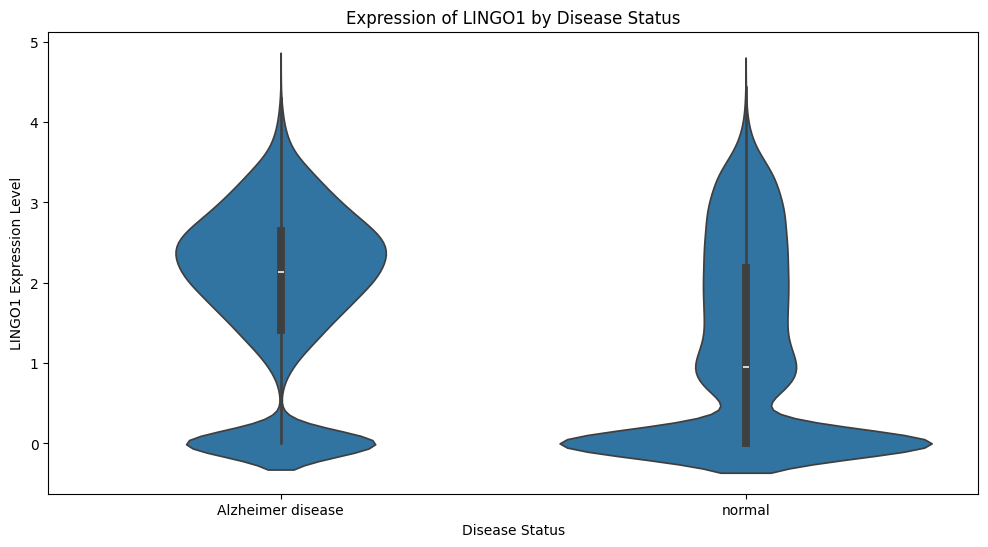

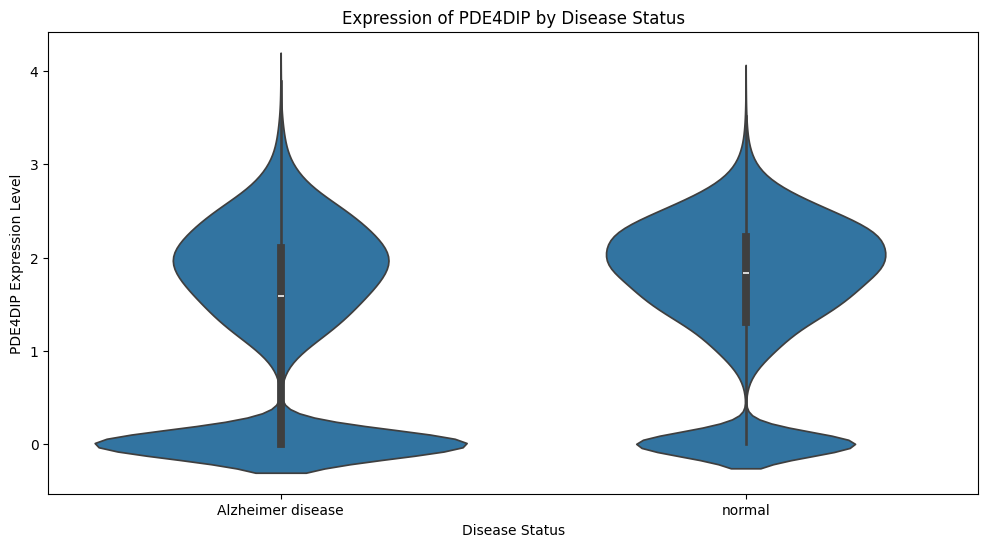

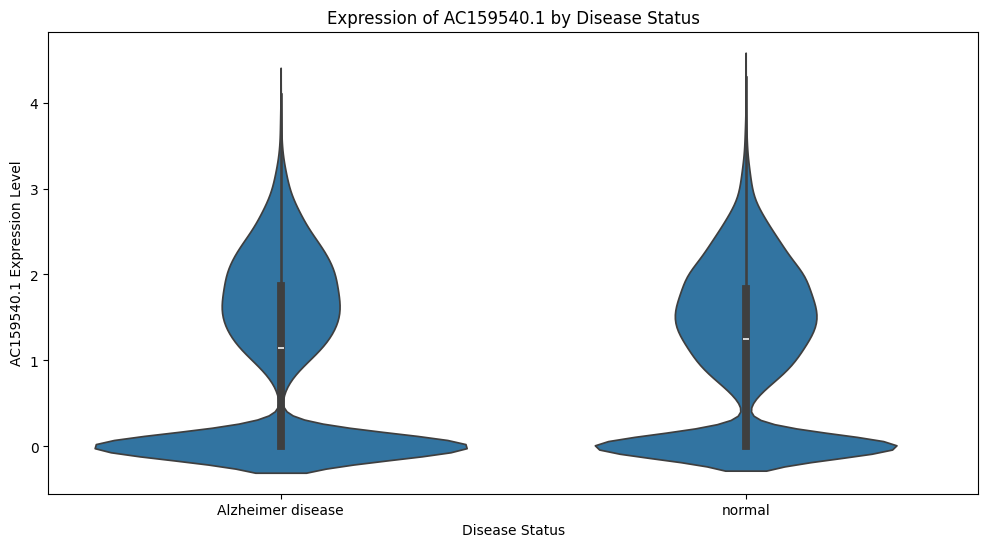

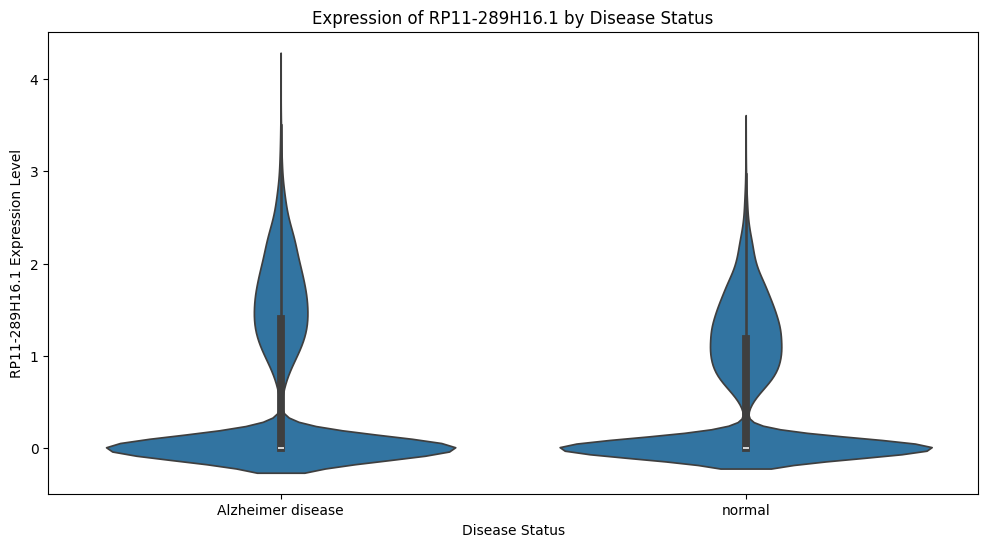

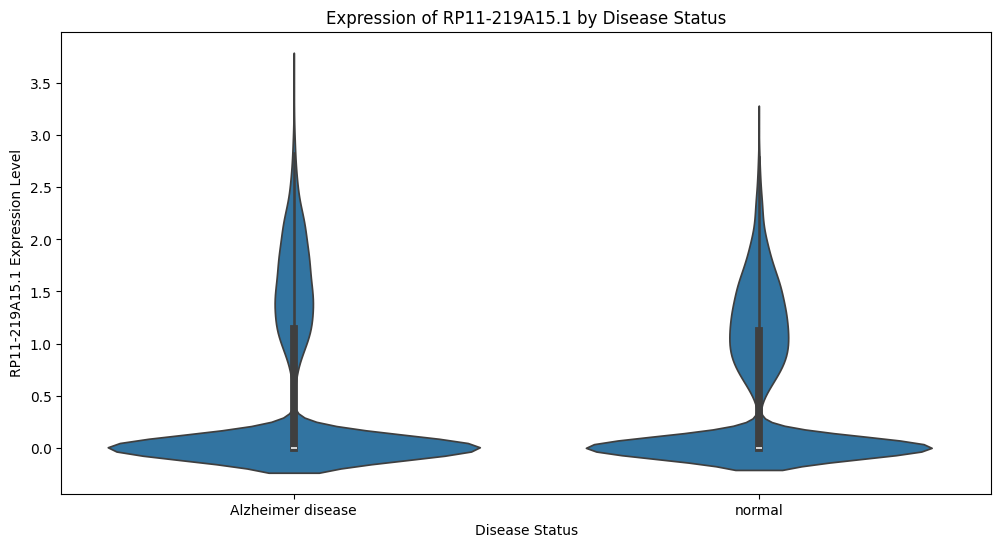

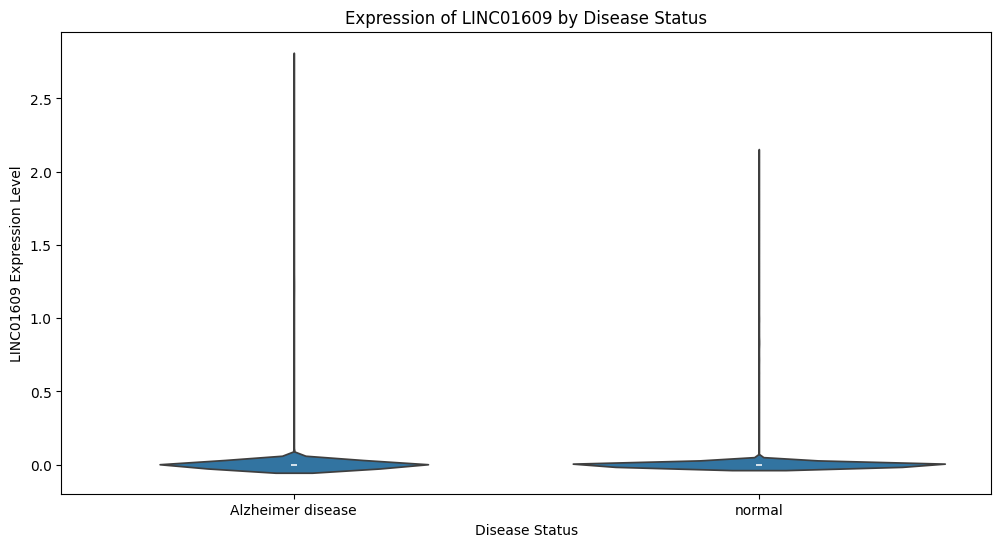

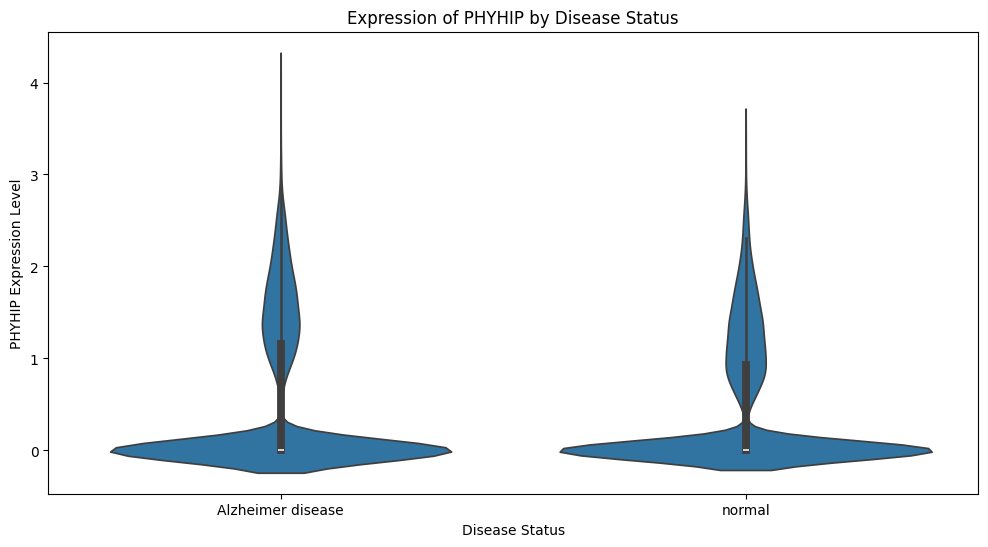

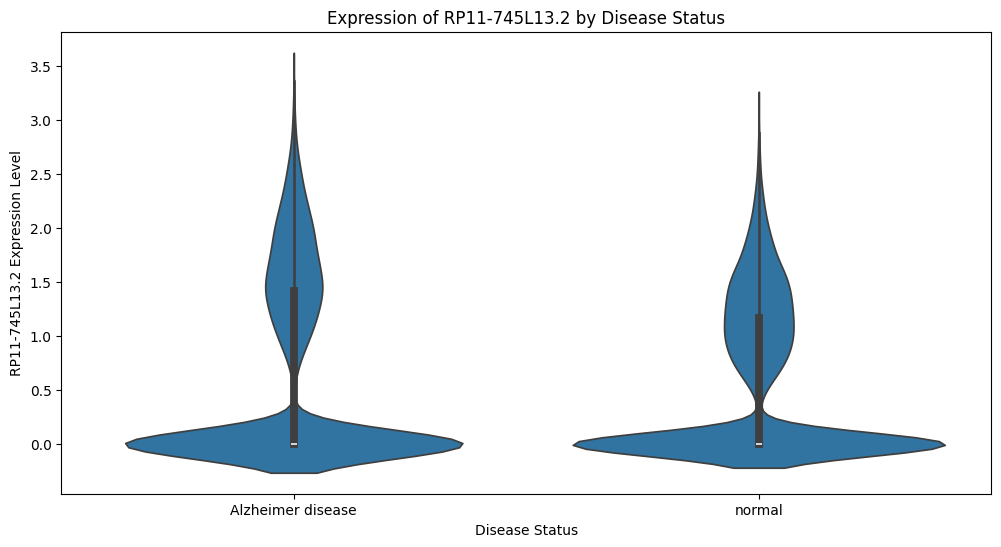

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter genes available in adata.var
available_genes = [gene_id for gene_id in gens_id if gene_id in adata.var.index]

# Create DataFrame for available genes
gene_expr_data = pd.DataFrame(adata[:, available_genes].X.toarray(), columns=available_genes, index=adata.obs.index)
gene_expr_data['disease_status'] = adata.obs['disease_status']

# Plot gene expression for each available gene by disease status
for gene_id, gene_name in zip(available_genes, gens_name):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='disease_status', y=gene_id, data=gene_expr_data)
    plt.title(f"Expression of {gene_name} by Disease Status")
    plt.xlabel("Disease Status")
    plt.ylabel(f"{gene_name} Expression Level")
    plt.show()

The violin plots display the expression levels of a set of genes associated with Alzheimer’s Disease (AD) compared to normal conditions. Here is a general analysis based on the presented plots:

  1.	Gene Expression Trends Across AD and Normal Conditions: For several genes, such as SLC26A3, RASGEF1B, and RP11-701H24.9, the plots show overlapping distributions between Alzheimer’s disease and normal conditions, with varying peaks. The overlap indicates that while there may be subtle differences in the expression levels of these genes in individuals with AD versus those without, the expression is not drastically altered between groups. For some genes, such as LINGO1 and PDE4DIP, the central tendency and variability are notably similar in both disease and normal conditions, suggesting that the changes in expression may not be highly disease-specific for these genes.

  2.	Variation and Distribution Patterns: Many of the plots exhibit broad distributions and a range of expression values within both groups, highlighting the biological variability present in gene expression levels across different individuals. This variability suggests that expression changes could be influenced by a complex interplay of factors, including age, genetic predisposition, or environmental factors, rather than being solely associated with disease status. Genes like RP11-219A15.1 show long distribution tails, indicating that some individuals might exhibit exceptionally high expression levels, possibly representing subpopulations or outliers worth further investigation.

  3.	Potential for Gene-Specific Disease Markers: Although the general trends suggest overlapping distributions, some genes exhibit subtle shifts or distinct distribution patterns between Alzheimer’s and normal groups. These differences, while not large, may provide potential clues about underlying molecular processes linked to AD. Further analysis using more refined statistical tests or combining these gene expression profiles could offer deeper insights into their roles as potential biomarkers or therapeutic targets for Alzheimer’s Disease. This would help determine their specificity and sensitivity in distinguishing AD from normal conditions.

In [ ]:
import scipy.stats as stats
import pandas as pd

# Perform statistical tests (t-test) between Alzheimer's disease and normal conditions for each gene
results = []
for gene_id, gene_name in zip(available_genes, gens_name):
    ad_group = gene_expr_data.loc[gene_expr_data['disease_status'] == 'Alzheimer disease', gene_id]
    normal_group = gene_expr_data.loc[gene_expr_data['disease_status'] == 'normal', gene_id]
    t_stat, p_value = stats.ttest_ind(ad_group, normal_group, equal_var=False, nan_policy='omit')
    results.append({'Gene': gene_name, 'T-Statistic': t_stat, 'P-Value': p_value})

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

             Gene  T-Statistic        P-Value
0         SLC26A3    36.024539  1.496124e-276
1        RASGEF1B    62.596273   0.000000e+00
2   RP11-701H24.9   -22.857203  2.348671e-114
3          LINGO1    48.893854   0.000000e+00
4         PDE4DIP   -26.530468  9.195920e-153
5      AC159540.1    -8.101535   5.693514e-16
6   RP11-289H16.1     4.549856   5.396213e-06
7   RP11-219A15.1    -5.400516   6.710915e-08
8       LINC01609     4.141559   3.463254e-05
9          PHYHIP     5.480242   4.292206e-08
10  RP11-745L13.2     6.811536   9.899463e-12


The statistical test results indicate significant differences in gene expression levels between individuals with Alzheimer’s Disease and normal controls for all the tested genes. Here are the key points

1. Highly Significant Differences: The very small p-values (most are effectively 0 or extremely close to 0) suggest that the differences in gene expression between Alzheimer’s and normal groups for each of these genes are highly statistically significant, meaning there is a very low probability that these differences are due to random chance.

2.	Magnitude of T-Statistics: Large positive or negative t-statistics indicate a substantial difference in mean expression levels between the groups. For example, genes like RASGEF1B, LINGO1, and PDE4DIP show high absolute values of t-statistics, implying a strong separation between groups, while genes such as RP11-289H16.1 have a relatively smaller but still significant t-statistic.

3.	Potential Implications: These findings suggest that these genes may play a significant role in distinguishing Alzheimer’s Disease from normal conditions, and further research may focus on their biological roles or potential as biomarkers for AD.

The below code is designed to process and visualize single-cell RNA sequencing data using a technique called UMAP (Uniform Manifold Approximation and Projection) and a clustering algorithm called Leiden.

Processing UMAP for Dataset 1: 9813a1d4-d107-459e-9b2e-7687be935f69


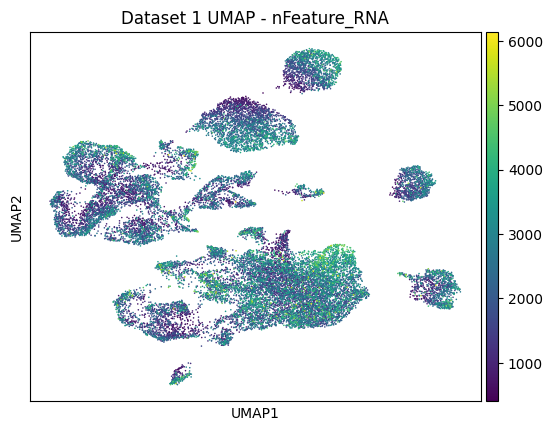

Processing UMAP for Dataset 2: 2f05ab20-a092-4bab-9276-3e0eb24e3fee


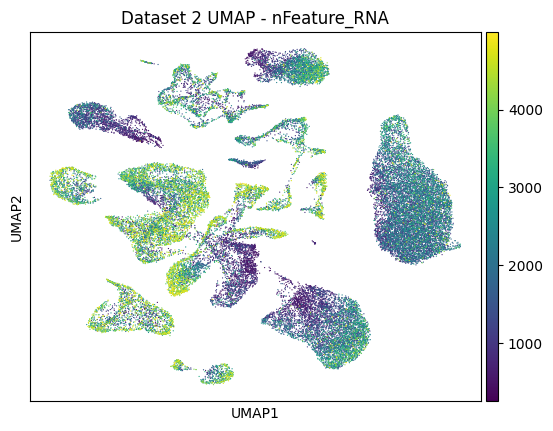

Processing UMAP for Dataset 3: 72955cdb-bd92-4135-aa52-21f33f9640db


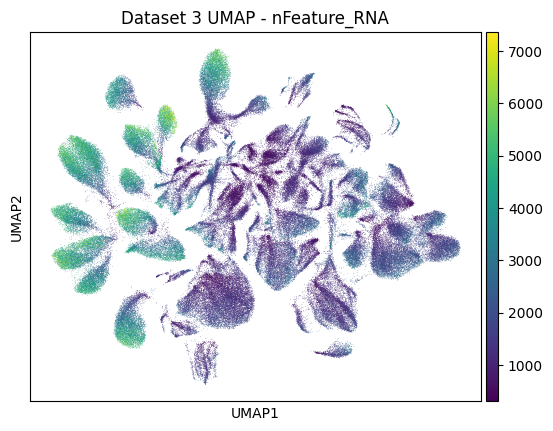

Processing UMAP for Dataset 4: f3ee7613-b27f-4deb-a5aa-1d4f9a2db963


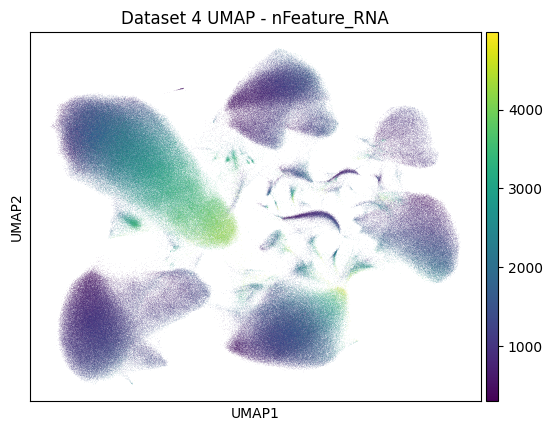

<ipython-input-10-89e0d19850e7>:19: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)  # Adjust resolution as needed


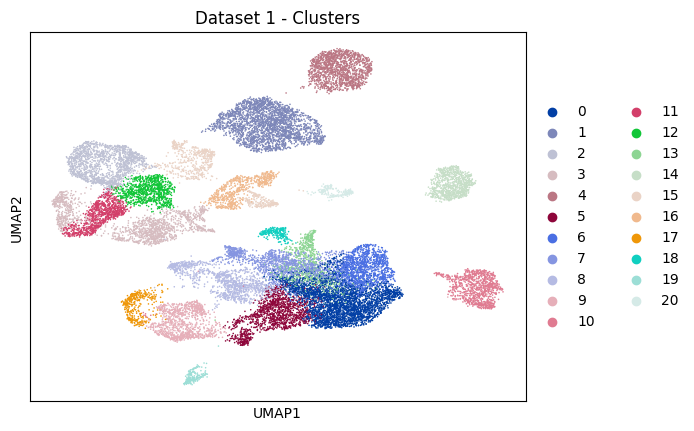

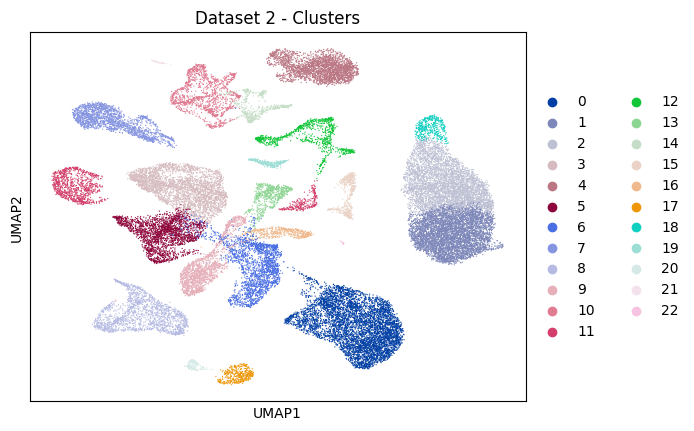

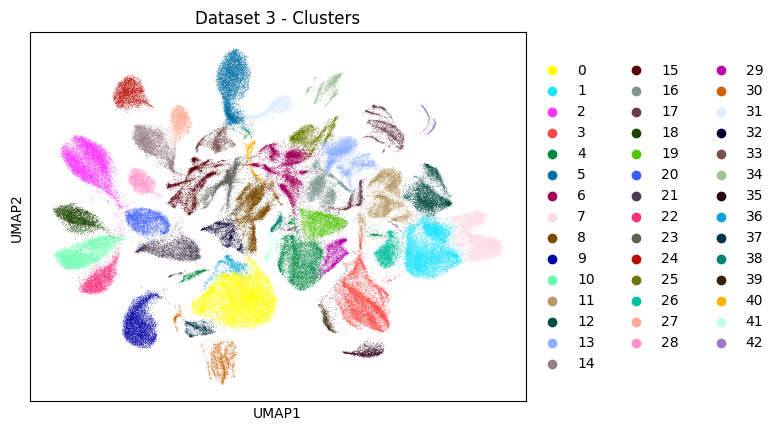

In [ ]:
# Assuming ann_data_list contains the loaded AnnData objects
for idx, adata in enumerate(ann_data_list):
    print(f"Processing UMAP for Dataset {idx + 1}: {dataset_ids[idx]}")

    # Check if 'nfeature_RNA' is in .obs and run preprocessing if needed
    if 'nFeature_RNA' not in adata.obs.columns:
        adata.obs['nFeature_RNA'] = (adata.X > 0).sum(axis=1)  # Count non-zero features per cell

    # Run neighbors and UMAP if not already computed
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)

    # Plot UMAP with 'nfeature_RNA' as color
    sc.pl.umap(adata, color='nFeature_RNA', title=f'Dataset {idx + 1} UMAP - nFeature_RNA', show=True)

plt.show()

for idx, adata in enumerate(ann_data_list):
    sc.tl.leiden(adata, resolution=0.5)  # Adjust resolution as needed
    sc.pl.umap(adata, color='leiden', title=f'Dataset {idx + 1} - Clusters')

Directly Identifying Relationships:

No Explicit Cross-Dataset Comparison: The code focuses on processing and visualizing each dataset individually. It calculates nFeature_RNA, performs UMAP, and applies Leiden clustering separately for each dataset in the ann_data_list.
Lack of Integration: There are no steps that directly compare or integrate the results (UMAP coordinates, clusters) obtained from different datasets.
Indirect Potential for Inference:

Visual Inspection: By generating UMAP plots for each dataset colored by nFeature_RNA and Leiden clusters, you can visually compare the distributions and clustering patterns across datasets. Similarities in these patterns might suggest potential relationships or shared biological features.
Further Analysis: The code provides a foundation for further analysis. You could extract the UMAP coordinates, cluster assignments, and other features for each dataset and then use external methods (e.g., correlation analysis, differential gene expression analysis between clusters across datasets) to explore relationships more rigorously.
Example Scenario:

Imagine you have two datasets of immune cells from different experimental conditions. If you observe similar UMAP structures and cluster distributions in both datasets (e.g., a distinct cluster of T cells in both), it might suggest a conserved immune response across the conditions. However, further analysis would be needed to confirm this relationship.

Limitations:

Batch Effects: Differences in data collection or processing (batch effects) can significantly influence UMAP and clustering results, making it difficult to distinguish true biological relationships from technical artifacts.
Need for Integration: To robustly identify relationships between datasets, you'd likely need to integrate the data using methods like batch correction or data harmonization before performing dimensionality reduction and clustering.
In summary:

The provided code does not directly identify relationships between datasets. However, the visualizations and outputs can be used as a starting point for visual comparison and further analysis to infer potential relationships. To establish more concrete connections, additional steps for data integration and cross-dataset analysis would be necessary.

Additional steps for data integration and cross-dataset analysis that would build upon the foundation of the provided code :
1. Data Integration and Harmonization:

Batch Correction: If the datasets were generated using different technologies or batches, batch effects can introduce unwanted variation. Batch correction methods aim to remove or minimize these technical differences while preserving biological variation. Popular methods include:

scanpy.pp.combat: A classic batch correction technique.
scanpy.external.pp.harmony_integrate: A more recent and often more effective method.
scanpy.external.pp.bbknn: Balances batch effects while preserving biological neighborhood structure.
Data Harmonization: This broader concept involves aligning datasets based on shared features, cell types, or biological processes. It might involve:

Identifying and merging common cell types or clusters across datasets based on marker gene expression.
Aligning gene expression profiles using methods like mutual nearest neighbors (MNN) or canonical correlation analysis (CCA).
Integrating datasets at the feature level by selecting common genes or using gene ontology enrichment analysis to focus on shared biological pathways.

2. Cross-Dataset Analysis:

Combined UMAP/Clustering: After integration, perform UMAP and clustering on the combined dataset. This allows you to visualize and analyze the data from all datasets in a shared space, potentially revealing relationships that were obscured by batch effects.

Differential Gene Expression: Identify genes that are differentially expressed between clusters or groups of cells across datasets. This can highlight biological processes that are conserved or differ between conditions or datasets. Tools like scanpy.tl.rank_genes_groups can be used.

Cell-Type Annotation Transfer: If one dataset has well-defined cell-type annotations, you can transfer these annotations to other datasets based on shared gene expression patterns or clustering results. Methods like cellHarmony or scmap can facilitate this process.

Trajectory Inference: If the datasets represent cells at different time points or developmental stages, trajectory inference methods can be applied to reconstruct cell lineages and identify dynamic changes in gene expression across datasets. Tools like Slingshot or Palantir can be used.

Correlation Analysis: Explore relationships between features (gene expression, cell-type proportions, metadata) across datasets using correlation analysis. This can reveal co-variation patterns or shared biological signals.